In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt



df=pd.read_csv('titanic-2.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# créer un sous-dataframe avec seulement les variables quantitatives
df_quant = df.select_dtypes(include=['int', 'float'])
df_quant=df_quant.drop('Survived',axis=1)
df_quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [6]:
df_quant

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [7]:
for col in df_quant.columns:
    print("Variable", col)
    print("Médiane:", df_quant[col].median())
    print("1er quartile:", df_quant[col].quantile(0.25))
    print("3ème quartile:", df_quant[col].quantile(0.75))
    print("Valeurs abérrantes:", df_quant[col][df_quant[col] < df_quant[col].quantile(0.25) - 1.5 * (df_quant[col].quantile(0.75) - df_quant[col].quantile(0.25))]\
                                .append(df_quant[col][df_quant[col] > df_quant[col].quantile(0.75) + 1.5 * (df_quant[col].quantile(0.75) - df_quant[col].quantile(0.25))]))

Variable PassengerId
Médiane: 446.0
1er quartile: 223.5
3ème quartile: 668.5
Valeurs abérrantes: Series([], Name: PassengerId, dtype: int64)
Variable Pclass
Médiane: 3.0
1er quartile: 2.0
3ème quartile: 3.0
Valeurs abérrantes: Series([], Name: Pclass, dtype: int64)
Variable Age
Médiane: 28.0
1er quartile: 20.125
3ème quartile: 38.0
Valeurs abérrantes: 33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
Variable SibSp
Médiane: 0.0
1er quartile: 0.0
3ème quartile: 1.0
Valeurs abérrantes: 7      3
16     4
24     3
27     3
50     4
59     5
63     3
68     4
71     5
85     3
88     3
119    4
159    8
164    4
171    4
176    3
180    8
182    4
201    8
229    3
233    4
261    4
266    4
278    4
324    8
341    3
374    3
386    5
409    3
480    5
485    3
541    4
542    4
634    3
642    3
683    5
686    4
726    3
787    4
792    8
813    4
819    3
824    4
846    8
850    

/var/folders/n0/dsqfv9zj6yd422p_6j037xv40000gn/T/ipykernel_3542/1915026394.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df_quant[col][df_quant[col] > df_quant[col].quantile(0.75) + 1.5 * (df_quant[col].quantile(0.75) - df_quant[col].quantile(0.25))]))
/var/folders/n0/dsqfv9zj6yd422p_6j037xv40000gn/T/ipykernel_3542/1915026394.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df_quant[col][df_quant[col] > df_quant[col].quantile(0.75) + 1.5 * (df_quant[col].quantile(0.75) - df_quant[col].quantile(0.25))]))
/var/folders/n0/dsqfv9zj6yd422p_6j037xv40000gn/T/ipykernel_3542/1915026394.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(df_quant[col][df_quant[col] > df_quant[col].quantile(0.75) + 

<Axes: >

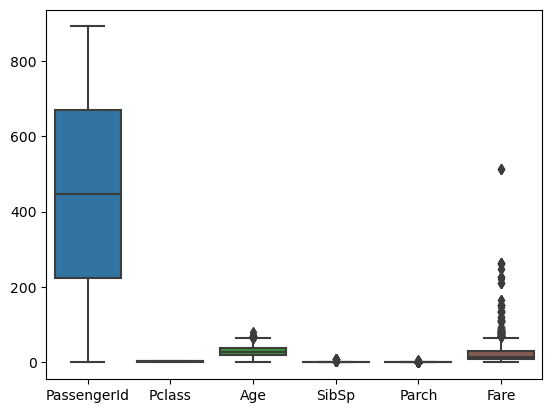

In [8]:
sns.boxplot(data=df_quant[['PassengerId', 'Pclass', 'Age','SibSp','Parch','Fare']], orient='v')

In [9]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_values_pct = df_quant.isnull().mean() * 100
missing_values_pct

PassengerId     0.00000
Pclass          0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Fare            0.00000
dtype: float64

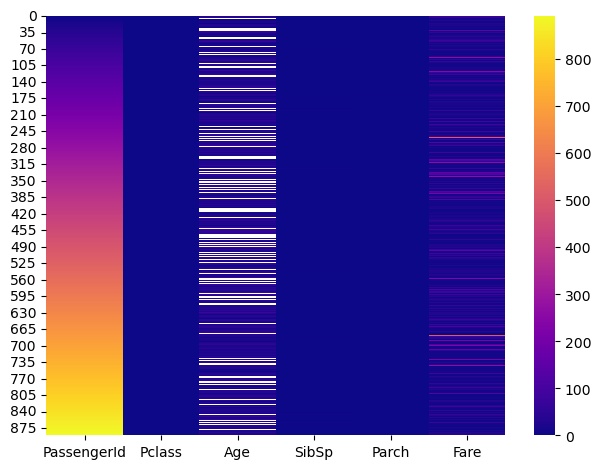

In [10]:
sns.heatmap(df_quant, annot = False, cbar = True, cmap = 'plasma')
plt.pyplot.tight_layout()

In [11]:
missing_values_pct[3]

0.0

In [12]:

#drop les colonnes dont le pourcentage de valeur nulle est >=60
for i in range(len(missing_values_pct)) :
    if missing_values_pct[i] >= 60 :
        df_quant.drop(df_quant.columns[[i]],axis=1)
    


In [13]:
correlation_quant =df_quant.corr()
correlation_quant

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


In [14]:
#changer 'sex' en int pour avoir la valeur de corrélatiopn avec le sexe du 
#passager aussi. Il faut remplacer 
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df['Sex'] = df['Sex'].astype(float)
correlation =df.corr()
correlation
#Pclass et sex ont la plus grande correlation avec survived.


/var/folders/n0/dsqfv9zj6yd422p_6j037xv40000gn/T/ipykernel_3542/2505252914.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =df.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


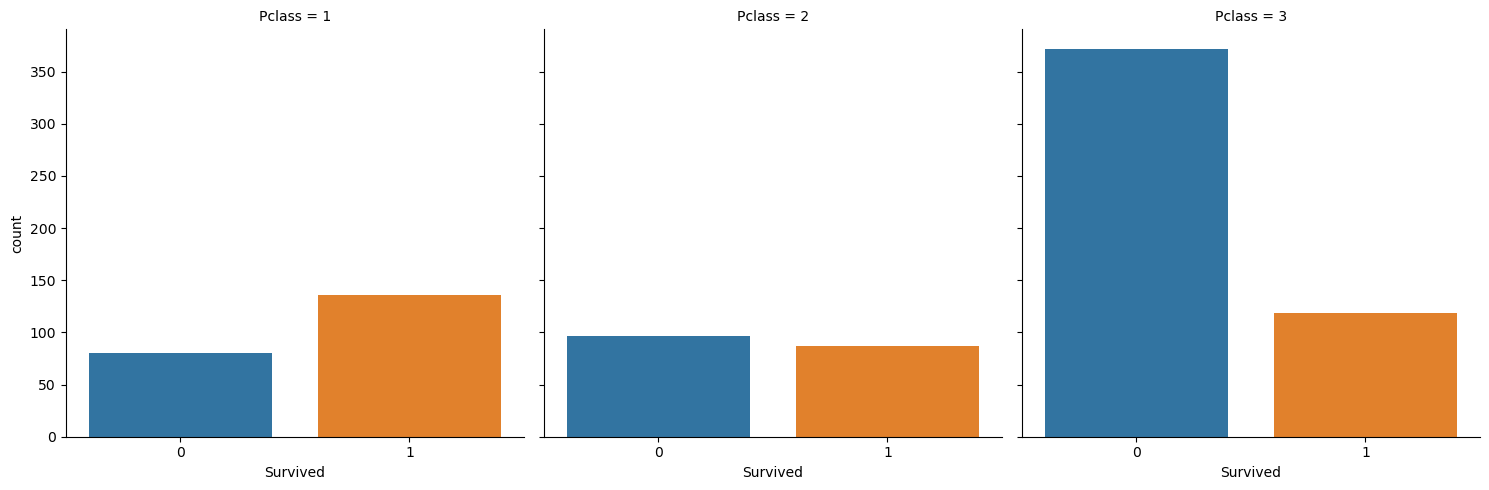

In [15]:
sns.catplot(x='Survived',col='Pclass',kind='count',data=df)
#catplot est le nom qu'on donne à factorplot à partir de la version 0.9 de seaborn
#On voit le nombre de passagers qui ont survécu pour chaque class de passagers
#Un graphe pour chaque classe de passager
#les passagers de 3ème classe sont ceux qui ont le plus péri
#trouvé sur wikipédia : Les passagers de troisième classe du Titanic sont les seuls à ne pas avoir un accès direct aux embarcations de sauvetage.
#effectivement l'emplacement de leurs cabines explique le nombre de morts en 3ème classe 
#bien plus grand que ceux qui ont suvécu

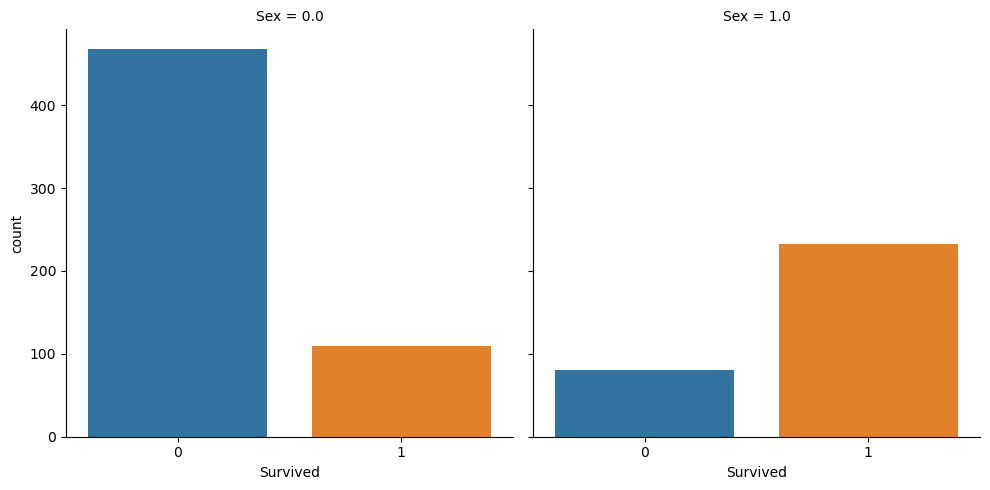

In [16]:
sns.catplot(x='Survived',col='Sex',kind='count',data=df)
#On voit que les hommes ont moins survécu car effectivement on sauvait les femmes et les enfants d'abord

<Axes: xlabel='Pclass', ylabel='Age'>

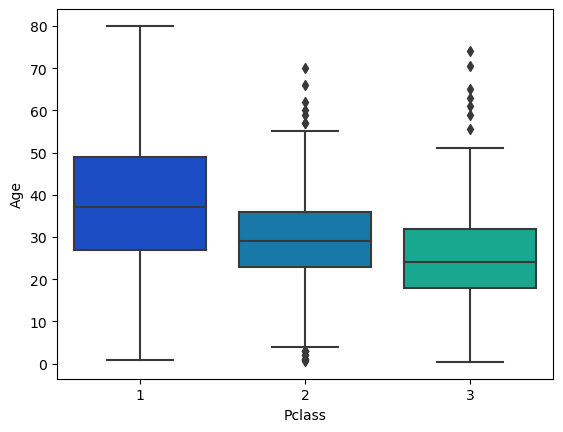

In [17]:
sns.boxplot(x='Pclass', y='Age',data=df_quant,palette='winter')

In [18]:
df['Age'].fillna(value=-1, inplace=True)
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    -1.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
print(df['Embarked'].value_counts()) 
df['Embarked']=encoder.fit_transform(df['Embarked'].astype(str)) 
print(df['Embarked'].value_counts())


#On encode S en 2, C en 0, Q en 1 et ceux dont on avait pas l'info en 3
#la variable embarked indique depuis quel port le passager à embraqué. Value_counts() 
#montre combien de passager ont tel ou tel valeur.


S    644
C    168
Q     77
Name: Embarked, dtype: int64
2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64


In [20]:
from sklearn.linear_model import LogisticRegression 
import matplotlib.pylab as plt

In [21]:
df.to_csv('titanic_mod.csv', index=False)